In [8]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
plt.style.use('classic')

In [9]:
a = 3
b = 2
n = 15
xor = np.linspace(0,2,15)
yor = a*xor + b

In [10]:
def line(x, m, b):
    return(m*x + b)

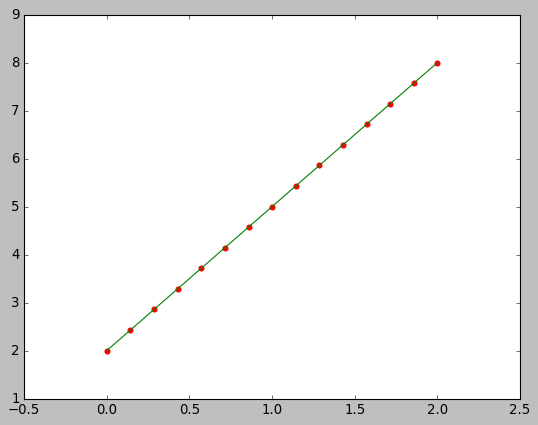

In [11]:
# Graficamos un conjuntp de datos
plt.plot(xor,line(xor,3,2), color='green')
plt.scatter(xor, yor, color='red')

In [12]:
sigma = 0.2
error = np.random.uniform(low=-sigma, high=sigma, size=15)

In [13]:
data = yor + error

<function matplotlib.pyplot.show(*args, **kw)>

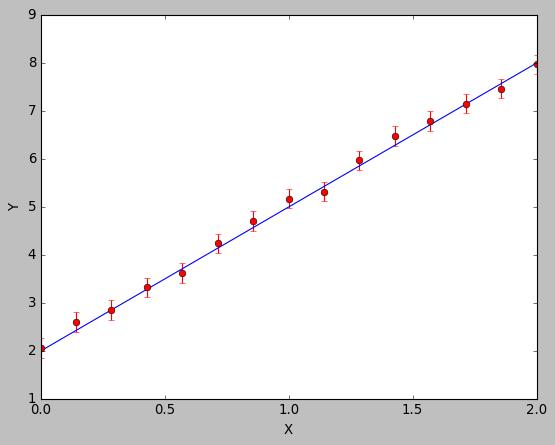

In [15]:
fig, ax = plt.subplots()
ax.errorbar(xor, data, yerr=sigma,fmt='o', c='red')
plt.plot(xor, yor, c='blue', label='ORIGINAL')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [16]:
def lnlh(theta):
    modelo=line(xor, theta[0],theta[1])
    diferencia = data - modelo
    u=0
    u = np.dot(diferencia, 0.2)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = np.random.rand()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

In [17]:
Nmuestras = 10000
sigma1 = 0.1
sigma2 = 0.1

Ncadenas = 8
thetainicio = [5,0.3]
cadenas = []

for j in range(Ncadenas):
    thetainicio = np.array([np.random.normal(np.random.uniform(5, .100), sigma1), np.random.normal(thetainicio[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetainicio
        else:
            thetat = np.array([np.random.normal(thetainicio[0], sigma1), np.random.normal(thetainicio[1], sigma2)])
            thetanuevo = Markov(thetainicio, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetainicio = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

In [18]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

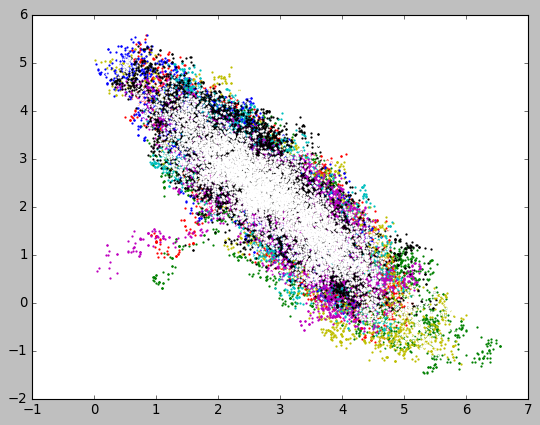

In [19]:
plt.scatter(x1, y1, color = 'g',s=1)
plt.scatter(x2, y2, color = 'r',s=1)
plt.scatter(x3, y3, color = 'y',s=1)
plt.scatter(x4, y4, color = 'b',s=1)
plt.scatter(x5, y5, color = 'c',s=1)
plt.scatter(x6, y6, color = 'm',s=1)
plt.scatter(x7, y7, color = 'k',s=1)
plt.scatter(x8, y8, color = 'w',s=1)

In [32]:
# Se define la funcion quemar para el burning de datos. Se ingresa el porcentaje a quemar
def quemar(x, porcentaje):
    p = porcentaje/100
    x2 = x[int(len(x)*p):]
    return x2

def quemar2(x, y, porcentaje):
    p = porcentaje/100
    x2 = x[int(len(x)*p):]
    y2 = y[int(len(y)*p):]
    return x2,y2

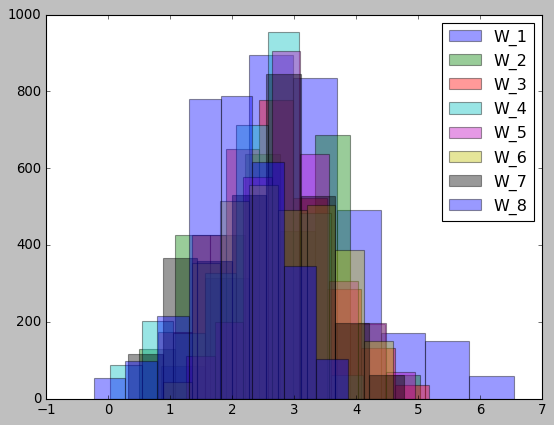

In [42]:
nb = 8
burning = 70 # porcentaje a quemar

plt.hist(quemar(x1, burning), alpha = 0.4, label = 'W_1', bins=nb)
plt.hist(quemar(x2, burning), alpha = 0.4, label = 'W_2', bins=nb)
plt.hist(quemar(x3, burning), alpha = 0.4, label = 'W_3', bins=nb)
plt.hist(quemar(x4, burning), alpha = 0.4, label = 'W_4', bins=nb)
plt.hist(quemar(x5, burning), alpha = 0.4, label = 'W_5', bins=nb)
plt.hist(quemar(x6, burning), alpha = 0.4, label = 'W_6', bins=nb)
plt.hist(quemar(x7, burning), alpha = 0.4, label = 'W_7', bins=nb)
plt.hist(quemar(x8, burning), alpha = 0.4, label = 'W_8', bins=nb)

plt.legend()

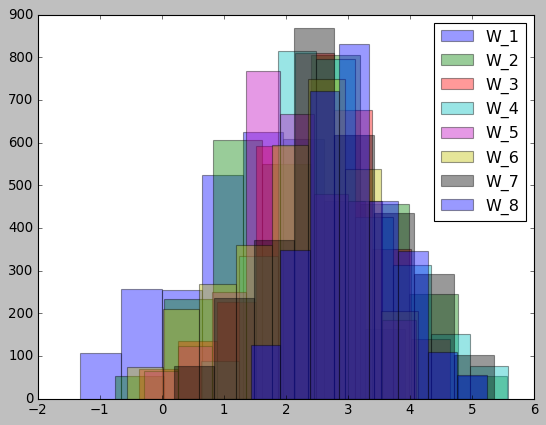

In [41]:
nb = 8
burning = 70 # porcentaje a quemar

plt.hist(quemar(y1, burning), alpha = 0.4, label = 'W_1', bins=nb)
plt.hist(quemar(y2, burning), alpha = 0.4, label = 'W_2', bins=nb)
plt.hist(quemar(y3, burning), alpha = 0.4, label = 'W_3', bins=nb)
plt.hist(quemar(y4, burning), alpha = 0.4, label = 'W_4', bins=nb)
plt.hist(quemar(y5, burning), alpha = 0.4, label = 'W_5', bins=nb)
plt.hist(quemar(y6, burning), alpha = 0.4, label = 'W_6', bins=nb)
plt.hist(quemar(y7, burning), alpha = 0.4, label = 'W_7', bins=nb)
plt.hist(quemar(y8, burning), alpha = 0.4, label = 'W_8', bins=nb)

plt.legend()

In [22]:
plt.scatter(x1, y1, color = 'g', '.')

SyntaxError: positional argument follows keyword argument (<ipython-input-22-6766f4a39d82>, line 1)

(array([ 203., 1201., 1898., 1159.,  298.,  174.,   67.]),
 array([0.85103648, 1.66372622, 2.47641595, 3.28910569, 4.10179542,
        4.91448516, 5.7271749 , 6.53986463]),
 <a list of 7 Patch objects>)

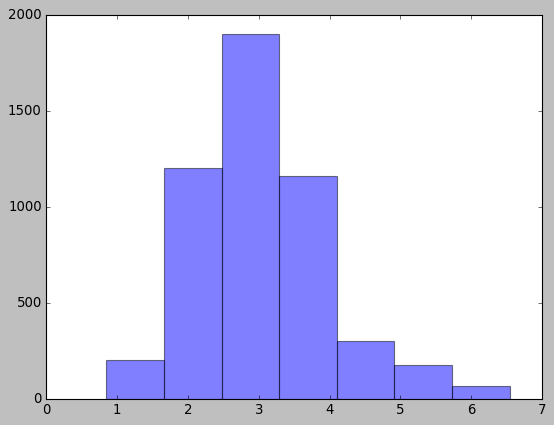

In [23]:
plt.hist(x1[int(Nmuestras/2):], alpha = 0.5, label = 'Walker_1', bins=7)